# SWB Trend Prediction

***Purpose***

- (1) 삶의 만족도가 증가하는 시점, 감소하는 시점 파악
- (2) 삶의 만족도가 증가할 때의 사용자 행동 패턴 파악
- (3) 삶의 만족도가 감소하는 시점에(1), 삶의 만족도가 증가할 때의 사용자 패턴을 추천(2) 

***undoing effect***
- 긍정적 정서가 부정적 정서의 영향 이후에 균형감, 유연성, 그리고 평정상태의 회복을 도와 불행한 효과를 빨리 사라지게 한다는 취소 효과(undoing effect)
****

- X (***all features are normalized for each user***)
    - Smartphone Features
        1. Activity
        2. App Usage
        3. Loc
        4. Sleep
    - Pre Survey 
    

- Y 
    - SWB Trend Prediction  :  전반적인 삶의 만족도 (COMOSWB) 점수를 기반으로 3일에 한번 측정한 값을 사용
        1. Increase : 이전 측정값에 비해 삶의 만족도가 증가한 경우
        2. Decrease : 이전 측정값에 비해 삶의 만족도가 감소한 경우
        3. No change : 이전 측정값과 동일한 경우



In [128]:
import os, sys
file_dir = '/Users/imsoyoung/Soyoung/Ajou/Project/DigitalPhenotype/DigitalPhenotype_overall/Code/Util'
sys.path.append(os.path.dirname(os.path.abspath
                                (os.path.abspath(file_dir))))

import Util.Utility as util
from IPython.display import Image


In [130]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
import datetime
import seaborn as sns

from matplotlib import rc

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [131]:
# !pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier


import shap

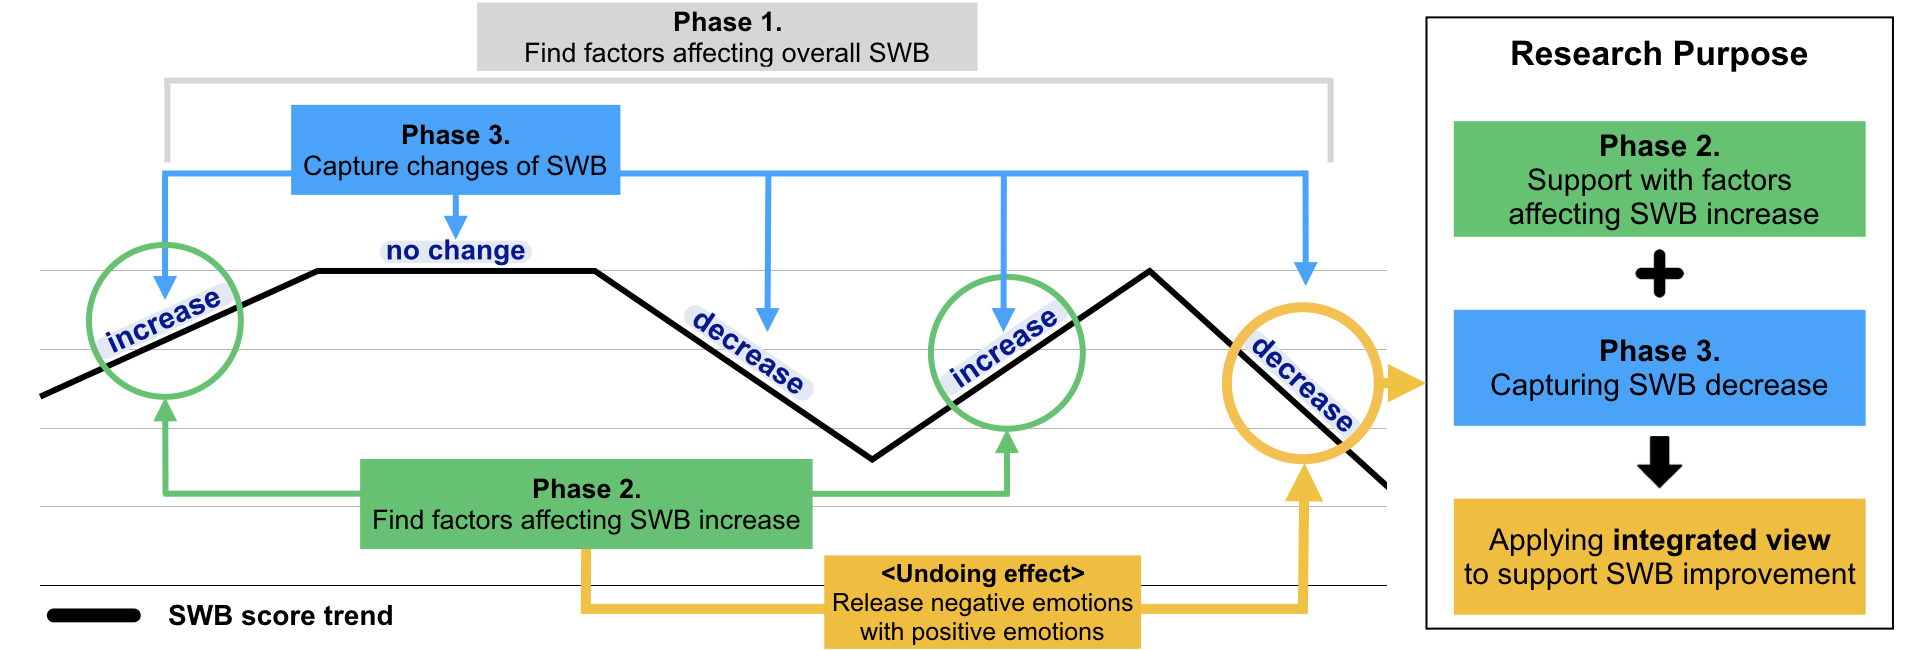

In [4]:
Image("../../img/DP_SWB_change.jpeg") 

# Features

In [8]:
swb = pd.read_csv('../../Sample_Data/Final/SWB_final.csv')
swb.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,gender,group,PPC,SAS,SWLS,BFI_EXT,...,sleep_duration,sleep_onset_abs,wake_up_abs,dayofWeek,SWB_score,label_3,POS,NEG,SAT,Measured
0,0,0,2017.9.10,20946596,0,1,1.0,39,23,10,...,0.399396,0.140638,0.317838,6,21.0,0,16,13,18,1
1,1,1,2017.9.11,20946596,0,1,1.0,39,23,10,...,0.613690,0.056220,0.340805,0,21.0,0,16,13,18,0
2,2,2,2017.9.12,20946596,0,1,1.0,39,23,10,...,0.571840,0.049202,0.311964,1,21.0,0,16,13,18,0
3,3,3,2017.9.13,20946596,0,1,1.0,39,23,10,...,0.658228,0.111161,0.420694,2,21.0,0,16,13,18,0
4,4,4,2017.9.14,20946596,0,1,1.0,39,23,10,...,0.332802,0.245503,0.392184,3,21.0,1,16,11,16,1


## Presurvey

1. 스트레스 - PSS
2. 운동기능 - EQ-5D-5L
3. 행복 - COMOSWB
4. 자아존중감 - RSE  
5. 우울 - PHQ 
6. 삶의 만족 - SWLS
7. 긍정심리자본 - PPC
8. 스마트폰 중독 - SAS
9. 성격 5 요인 - BFI

In [19]:
swb_survey = swb.iloc[:, 2:30]
swb_survey.head()

,timestamp,uid,gender,group,PPC,SAS,SWLS,BFI_EXT,BFI_CON,BFI_NEU,...,RSE,PPC_HOP,PPC_OPT,PPC_RES,PPC_SEL,EQ_MOB,EQ_PAI,EQ_SEL,EQ_USU,PSS
0,2017.9.10,20946596,0,1,1.0,39,23,10,11,8,...,4.5,19.25,28.0,14.0,19.75,1,1,1,1,-2
1,2017.9.11,20946596,0,1,1.0,39,23,10,11,8,...,4.5,19.25,28.0,14.0,19.75,1,1,1,1,-2
2,2017.9.12,20946596,0,1,1.0,39,23,10,11,8,...,4.5,19.25,28.0,14.0,19.75,1,1,1,1,-2
3,2017.9.13,20946596,0,1,1.0,39,23,10,11,8,...,4.5,19.25,28.0,14.0,19.75,1,1,1,1,-2
4,2017.9.14,20946596,0,1,1.0,39,23,10,11,8,...,4.5,19.25,28.0,14.0,19.75,1,1,1,1,-2


## Loc

- 0, 1, 2, ...10 : 위치정보(GPS) 를 GMM Clustering 하여 각 위치 군집에 학생이 머무른 시간 계산
- distance : 일별 총 이동거리
- move_cnt : 군집화된 위치 정보를 기반으로, 일별 군집간 이동 수 계산

In [23]:
swb_loc = swb.iloc[:, 30:43]
swb_loc.head()

,0,1,10,2,3,4,5,6,7,8,9,distance,move_cnt
0,0.0,0.000000,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.636364,0.307988,0.05
1,0.0,0.010137,0.994555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.041406,0.20
2,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.090053,0.00
3,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.054847,0.00
4,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.022812,0.00


## App Usage

- App sum : 일별 핸드폰 사용량
- 일별 각 카테고리 사용량 :  각 카테고리는 google play store 크롤링 기준
- morning screenOn, evening screenOn, afternoon screenOn : 시간대별 Screen on duration


In [31]:
swb_app = swb.iloc[:, 43:62]
swb_app.head()

,App_sum,Art&Design&Photo,Bank&Purchase,Books & Reference,Educational,Entertainment&Music,Food & Drink,Games&Comics,Health&Well,News & Magazines,Others,Shopping,Social&Communication,Travel,Utilities,Weather,afternoon screenOn,evening screenOn,morning screenOn
0,0.654676,0.0,0.047586,0.051020,0.0,0.321606,1.00000,0.181319,0.0,0.0,0.000000,0.837912,0.829670,0.0,0.363736,0.0,0.652381,0.134529,0.129310
1,0.812950,0.0,0.007664,0.193697,0.0,0.136312,0.14642,0.476991,0.0,0.0,0.000000,0.000000,0.776549,0.0,0.439381,0.0,0.466667,0.470852,0.362069
2,0.501799,0.0,0.124168,0.389876,0.0,0.000000,0.00000,0.094624,0.0,0.0,0.182796,0.000000,0.792115,0.0,0.000000,0.0,0.328571,0.381166,0.206897
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.647619,0.479821,0.353448
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.509524,0.197309,0.172414


## Activity

***Still : Google Fit API 이용***

- ratio_still (morning, afternoon, evening) : 각 시간대별 움직임이 없는 시간의 비율
- still_total_all : 하룻동안 움직임이 없었던 시간

In [34]:
swb_act = swb.iloc[:, 62:66]
swb_act.head()

,ratio_still_afternoon,ratio_still_evening,ratio_still_morning,still_total_all
0,0.421557,0.480348,0.787500,0.555189
1,0.660395,0.277206,0.814350,0.630972
2,0.653123,0.379668,0.732398,0.703460
3,0.713731,0.273192,0.785498,0.639209
4,0.539001,0.380409,0.800743,0.691928


## Sleep & Day

- sleep_duration : 일별 수면시간
- sleep_onset_abs : 잠든 시각
- wake_up_abs : 일어난 시각

- dayofWeek : 요일

In [39]:
swb_sleep_day = swb.iloc[:, 66:70]
swb_sleep_day.head()

,sleep_duration,sleep_onset_abs,wake_up_abs,dayofWeek
0,0.399396,0.140638,0.317838,6
1,0.613690,0.056220,0.340805,0
2,0.571840,0.049202,0.311964,1
3,0.658228,0.111161,0.420694,2
4,0.332802,0.245503,0.392184,3


## Others

- SWB_score : POS + SAT - NEG
- label_3 : y labeling (3class)
- POS, NEG, SAT : COMOSWB 측정 요소
- Measures : 측정한 날 체크
(3일에 한번 측정했기 때문에 데이터의 양을 늘리기 위해 SWB 값을 linear 하게 가정)

# Simple Classification

- Randomforest
- LogisticRegression
- AdaBoost

In [43]:
swb.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,gender,group,PPC,SAS,SWLS,BFI_EXT,...,sleep_duration,sleep_onset_abs,wake_up_abs,dayofWeek,SWB_score,label_3,POS,NEG,SAT,Measured
0,0,0,2017.9.10,20946596,0,1,1.0,39,23,10,...,0.399396,0.140638,0.317838,6,21.0,0,16,13,18,1
1,1,1,2017.9.11,20946596,0,1,1.0,39,23,10,...,0.613690,0.056220,0.340805,0,21.0,0,16,13,18,0
2,2,2,2017.9.12,20946596,0,1,1.0,39,23,10,...,0.571840,0.049202,0.311964,1,21.0,0,16,13,18,0
3,3,3,2017.9.13,20946596,0,1,1.0,39,23,10,...,0.658228,0.111161,0.420694,2,21.0,0,16,13,18,0
4,4,4,2017.9.14,20946596,0,1,1.0,39,23,10,...,0.332802,0.245503,0.392184,3,21.0,1,16,11,16,1


In [52]:
def classification(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

    pipelines = []

    pipelines.append(('RF', Pipeline([('RF',RandomForestClassifier())])))
    pipelines.append(('LR', Pipeline([('LR',LogisticRegression() )])))
    pipelines.append(('AB', Pipeline([('AB', AdaBoostClassifier(n_estimators=50,
                             learning_rate=1))])))


    results = []
    names = []
    tmp_df = pd.DataFrame(columns = ['model', 'accuracy', 'f1_micro', 'f1_macro'])
    
    for name, model in pipelines:
        kfold = KFold(n_splits=10)
        scoring = {'accuracy': 'accuracy',
           'f1_micro': 'f1_micro',
           'f1_macro': 'f1_macro'}
        
        cv_results = cross_validate(model, X_train, Y_train, cv=kfold, scoring=scoring)

        results.append(cv_results)
        names.append(name)
        tmp_df = tmp_df.append({'model': name,'accuracy': cv_results['test_accuracy'].mean().mean(),
                               'f1_micro':cv_results['test_f1_micro'].mean().mean(),
                               'f1_macro': cv_results['test_f1_macro'].mean().mean()
                               }, ignore_index = True)
        

    return tmp_df

def getClassResult(normalized_df, allFeatures, ylabel):

    ### 모든 유저의 모델 성능
    class_all = pd.DataFrame()
    
    X = normalized_df[allFeatures].values
    Y = normalized_df[ylabel].values
    class_all = classification(X, Y)

    ### 각 유저별 모델 성능
    class_each = pd.DataFrame()
    count = 0
    for user in set(normalized_df['uid']):
        count +=1
        print("{:.2f}".format(float(count)/len(set(normalized_df['uid']))*100), end = '\r')
        tmp = normalized_df[normalized_df['uid'] == user]
        X = tmp[allFeatures].values
        Y = tmp[ylabel].values
        tmp_each = classification(X, Y)
        tmp_each['uid'] = user
        class_each = pd.concat([class_each.reset_index(drop=True), tmp_each.reset_index(drop=True)])
    
    
    return  class_all, class_each

In [70]:
user_info = ['uid', 'gender', 'group']
loc = ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9','distance', 'move_cnt']
act = ['ratio_still_afternoon', 'ratio_still_evening', 'ratio_still_morning','still_total_all']
app = ['App_sum', 'Art&Design&Photo', 'Bank&Purchase',
       'Books & Reference', 'Educational', 'Entertainment&Music',
       'Food & Drink', 'Games&Comics', 'News & Magazines',
       'Others', 'Shopping', 'Social&Communication', 'Travel', 'Utilities',
       'Weather', 
         'afternoon screenOn', 'evening screenOn', 'morning screenOn']
sleep_day = ['sleep_duration', 'sleep_onset_abs', 'still_total_all', 
         'wake_up_abs','dayofWeek']

features = user_info[1:] + loc + act + app + sleep_day



In [ ]:
class_all, class_each = getClassResult(swb, features, 'label_3')

In [54]:
class_all

,model,accuracy,f1_micro,f1_macro
0,RF,0.476878,0.476878,0.350069
1,LR,0.466232,0.466232,0.334741
2,AB,0.463243,0.463243,0.352109


In [57]:
class_each.sort_values(by='f1_micro', ascending=False)

,model,accuracy,f1_micro,f1_macro,uid
126,RF,0.960714,0.960714,0.839487,46029500
127,LR,0.960714,0.960714,0.839487,46029500
128,AB,0.923214,0.923214,0.729011,46029500
99,RF,0.710714,0.710714,0.620310,22955826
101,AB,0.669643,0.669643,0.607215,22955826
...,...,...,...,...,...
152,AB,0.337500,0.337500,0.275794,41860680
229,LR,0.319643,0.319643,0.263042,41651454
220,LR,0.314286,0.314286,0.217937,93542520
224,AB,0.308929,0.308929,0.219935,47043065


## Model 해석 (SHAP)

- sample user 의 모델 예측 결과 분석
- best case : 46029500 (***No change 에 편향된 데이터***)
- worst case : 93542520 


In [64]:
import collections

sample1 = swb[swb['uid'] == 46029500]
print(sample1.shape, collections.Counter(sample1['label_3']))


sample2 = swb[swb['uid'] == 93542520]
print(sample2.shape, collections.Counter(sample2['label_3']))


(98, 76) Counter({0: 94, 1: 4})
(88, 76) Counter({1: 39, -1: 31, 0: 18})


### Sample1

In [68]:
sample1.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,gender,group,PPC,SAS,SWLS,BFI_EXT,...,sleep_duration,sleep_onset_abs,wake_up_abs,dayofWeek,SWB_score,label_3,POS,NEG,SAT,Measured
2690,2690,2690,2017.9.10,46029500,0,0,1.0,17,18,9,...,0.152352,0.300795,0.377540,6,6.0,1,10,15,11,1
2691,2691,2691,2017.9.11,46029500,0,0,1.0,17,18,9,...,0.662427,0.011696,0.374900,0,7.5,1,10,15,11,0
2692,2692,2692,2017.9.12,46029500,0,0,1.0,17,18,9,...,0.631540,0.004850,0.348801,1,9.0,1,10,15,11,0
2693,2693,2693,2017.9.13,46029500,0,0,1.0,17,18,9,...,0.650122,0.013413,0.369295,2,10.5,1,10,15,11,0
2694,2694,2694,2017.9.14,46029500,0,0,1.0,17,18,9,...,0.750692,0.961536,0.371609,3,12.0,0,12,12,12,1


In [72]:
X = sample1[features]
y = sample1['label_3'].values

X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.20, random_state=42)

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=100)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)


print('정확도 : ', metrics.accuracy_score(Y_test, y_pred))

print('f1-score macro: ', metrics.f1_score(Y_test, y_pred, average='macro'))

print('f1-score micro: ', metrics.f1_score(Y_test, y_pred, average='micro'))

print('f1-score weighted: ', metrics.f1_score(Y_test, y_pred, average='weighted'))


정확도 :  0.95
f1-score macro:  0.48717948717948717
f1-score micro:  0.9500000000000001
f1-score weighted:  0.9256410256410256


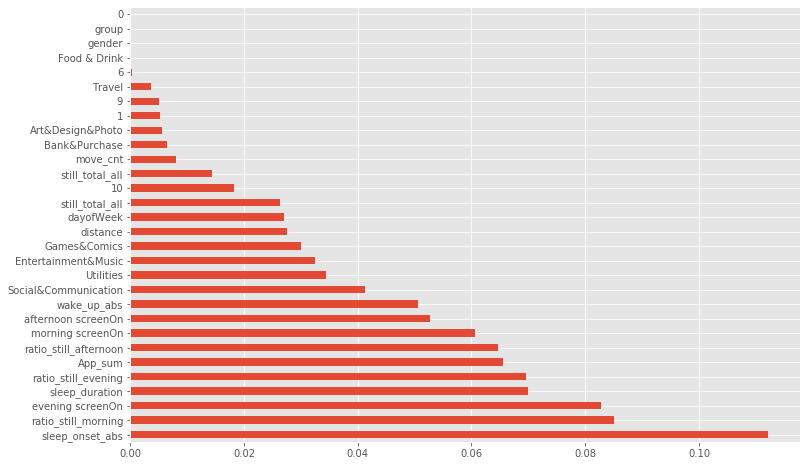

In [74]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')  


In [89]:
shap.initjs()
explainer = shap.TreeExplainer(rf)
explainer.feature_perturbation = "tree_path_dependent"

# print(X_test.iloc[10,:])
print(set(y), Y_test[10])

shap_values = explainer.shap_values(X_test.iloc[10,:])
# print(shap_values, explainer.expected_value)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[10,:])

{0, 1, -1} -1


### Sample2

In [82]:
X = sample2[features]
y = sample2['label_3'].values

X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.20, random_state=42)

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=100)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)


print('정확도 : ', metrics.accuracy_score(Y_test, y_pred))

print('f1-score macro: ', metrics.f1_score(Y_test, y_pred, average='macro'))

print('f1-score micro: ', metrics.f1_score(Y_test, y_pred, average='micro'))

print('f1-score weighted: ', metrics.f1_score(Y_test, y_pred, average='weighted'))


정확도 :  0.5
f1-score macro:  0.43909774436090226
f1-score micro:  0.5
f1-score weighted:  0.5030910609857978


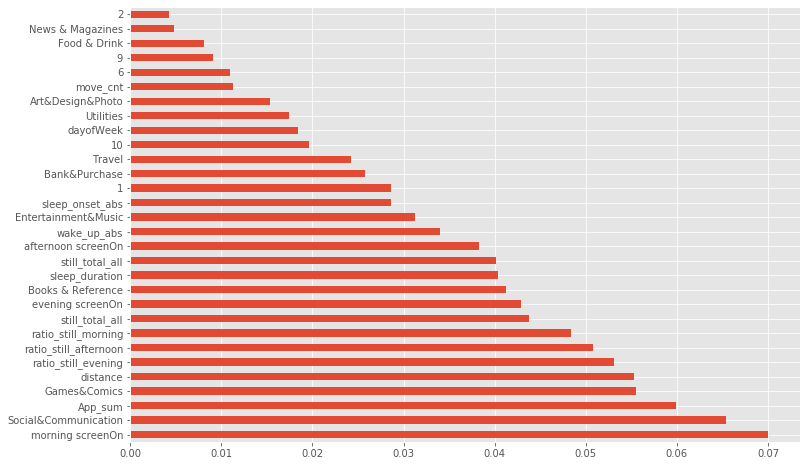

In [83]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')  


In [88]:
shap.initjs()
explainer = shap.TreeExplainer(rf)
explainer.feature_perturbation = "tree_path_dependent"

# print(X_test.iloc[10,:])
print(set(y), Y_test[10])

shap_values = explainer.shap_values(X_test.iloc[10,:])
# print(shap_values, explainer.expected_value)
shap.force_plot(explainer.expected_value[2], shap_values[2], X_test.iloc[10,:])

{0, 1, -1} -1


# Best Classification

- 시계열 데이터의 특성을 고려

In [87]:
swb.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,gender,group,PPC,SAS,SWLS,BFI_EXT,...,sleep_duration,sleep_onset_abs,wake_up_abs,dayofWeek,SWB_score,label_3,POS,NEG,SAT,Measured
0,0,0,2017.9.10,20946596,0,1,1.0,39,23,10,...,0.399396,0.140638,0.317838,6,21.0,0,16,13,18,1
1,1,1,2017.9.11,20946596,0,1,1.0,39,23,10,...,0.613690,0.056220,0.340805,0,21.0,0,16,13,18,0
2,2,2,2017.9.12,20946596,0,1,1.0,39,23,10,...,0.571840,0.049202,0.311964,1,21.0,0,16,13,18,0
3,3,3,2017.9.13,20946596,0,1,1.0,39,23,10,...,0.658228,0.111161,0.420694,2,21.0,0,16,13,18,0
4,4,4,2017.9.14,20946596,0,1,1.0,39,23,10,...,0.332802,0.245503,0.392184,3,21.0,1,16,11,16,1


- Data 특성 : 시계열
    - 사람들의 SWB score 의 변화(Trend) 파악을 위해 LSTM 시도

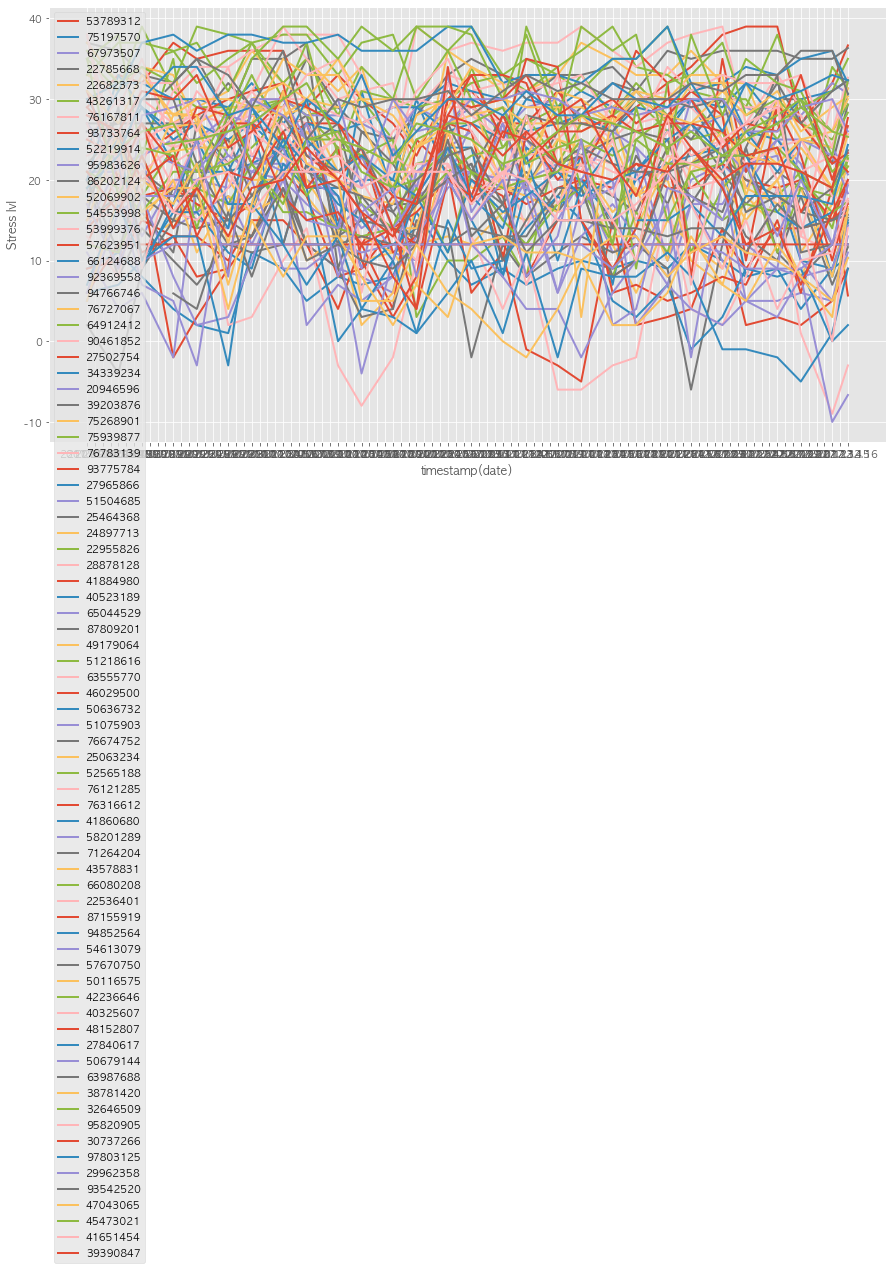

In [93]:
for uid in set(swb['uid']):
   
    user_Df = swb[swb['uid'] == uid]
        
    plt.plot(user_Df['timestamp'], user_Df['SWB_score'], label = uid)
    plt.xlabel('timestamp(date)')
    plt.ylabel('Stress lvl')
    plt.legend(loc = 'upper left')


## Using  statsmodel (ARMA)

- statsmode.ARMA 모형 (Auto-Regressive Integrated Moving-Average)      

    -  ***AR (자기상관 - Autocorrelation)*** 
        -  시계열 데이터 {Yt} 의 과거치(previous observation Y(t-1), Y(t-2)...)가 설명 변수인 모형
        - 이전의 값이 이후의 값에 영향을 미치는 경우
        
    -  ***MA (이동 평균 - Moving Average)*** 
        - 과거의 오차항(e(t-1), e(t-2))이 설명변수인 MA 모형
        - 시간이 지날수록 어떠한 Random Variable 의 평균값이 지속적으로 증가하거나 감소하는 경향이 있는 경우 (봄에서 여름이 될수록 가계 전기 수요량이 증가하는 경향이 있는 것처럼)
    
    - AR + MA

***
- AR 모형의 가설 : 과거의 패턴이 지속된다면 시계열 데이터 관측치 Y(t) 는 과거 관측치로 예측할 수 있을 것이다.
    - Q1. 얼마나 먼 과거 데이터까지 이용할 것인가?
    - Q2. 과거 데이터의 시간이 멀면 멀수록, 영향력은 줄어들 것이다   
    --> 이런 상황을 고려할 수 있는 가중치를 사용해야 하지 않을까?

- ARMA 모형
    - 과거, 현재의 분석에 대해서는 매우 정확
    - 시계열로 미래를 알 수 없지만, 미래에 대한 시나리오를 비교하는 데 쓸 수 있음
***
- statsmodel : [https://datascienceschool.net/view-notebook/77ee0e1bb6754ad89e0da14c6d461953/  ]
- ARMA : https://m.blog.naver.com/bluefish850/220749045909

In [98]:
# !pip install statsmodels

In [106]:
import statsmodels.api as sm

sample = swb[swb['uid'] == 22955826]
model_ARMA = sm.tsa.ARMA(sample["SWB_score"], (1,2))
result_ARMA = model_ARMA.fit()

print(result_ARMA.summary())

                              ARMA Model Results                              
Dep. Variable:              SWB_score   No. Observations:                   98
Model:                     ARMA(1, 2)   Log Likelihood                -195.759
Method:                       css-mle   S.D. of innovations              1.746
Date:                Fri, 27 Mar 2020   AIC                            401.518
Time:                        13:23:50   BIC                            414.443
Sample:                             0   HQIC                           406.746
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              28.0692      2.993      9.379      0.000      22.204      33.935
ar.L1.SWB_score     0.8668      0.050     17.191      0.000       0.768       0.966
ma.L1.SWB_score     0.7869      

An unsupported index was provided and will be ignored when e.g. forecasting.


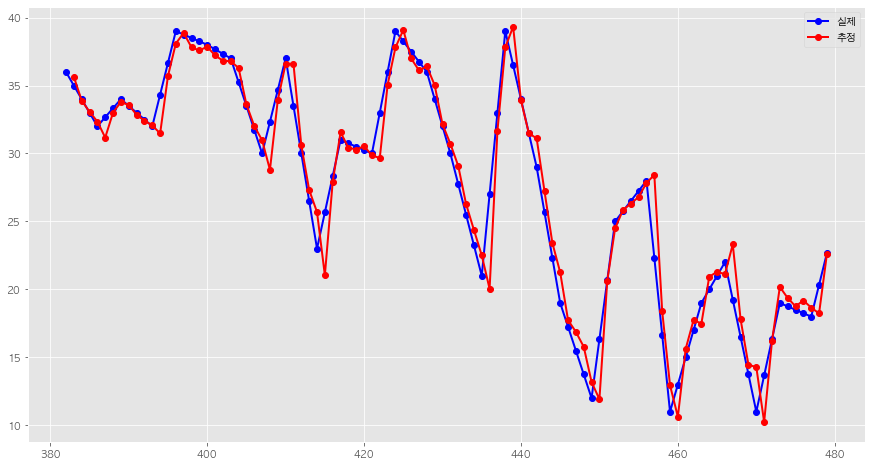

In [104]:
plt.plot(sample["SWB_score"], "bo-", label="실제")
plt.plot(result_ARMA.predict(1), "ro-", label="추정")
plt.legend()
plt.show()

## Using RNN

In [111]:
# from tf.keras.models import Sequential # This does not work!
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [112]:
print(tf.__version__)
print(tf.keras.__version__)

1.15.0
2.2.4-tf


In [113]:
swb.head()
swb['timestamp'] = swb[]

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,gender,group,PPC,SAS,SWLS,BFI_EXT,...,sleep_duration,sleep_onset_abs,wake_up_abs,dayofWeek,SWB_score,label_3,POS,NEG,SAT,Measured
0,0,0,2017.9.10,20946596,0,1,1.0,39,23,10,...,0.399396,0.140638,0.317838,6,21.0,0,16,13,18,1
1,1,1,2017.9.11,20946596,0,1,1.0,39,23,10,...,0.613690,0.056220,0.340805,0,21.0,0,16,13,18,0
2,2,2,2017.9.12,20946596,0,1,1.0,39,23,10,...,0.571840,0.049202,0.311964,1,21.0,0,16,13,18,0
3,3,3,2017.9.13,20946596,0,1,1.0,39,23,10,...,0.658228,0.111161,0.420694,2,21.0,0,16,13,18,0
4,4,4,2017.9.14,20946596,0,1,1.0,39,23,10,...,0.332802,0.245503,0.392184,3,21.0,1,16,11,16,1


In [132]:
util.toDatetime(swb, ['timestamp'], "%Y%m%d")

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,gender,group,PPC,SAS,SWLS,BFI_EXT,...,sleep_duration,sleep_onset_abs,wake_up_abs,dayofWeek,SWB_score,label_3,POS,NEG,SAT,Measured
0,0,0,2017-09-10,20946596,0,1,1.0,39,23,10,...,0.399396,0.140638,0.317838,6,21.000000,0,16,13,18,1
1,1,1,2017-09-11,20946596,0,1,1.0,39,23,10,...,0.613690,0.056220,0.340805,0,21.000000,0,16,13,18,0
2,2,2,2017-09-12,20946596,0,1,1.0,39,23,10,...,0.571840,0.049202,0.311964,1,21.000000,0,16,13,18,0
3,3,3,2017-09-13,20946596,0,1,1.0,39,23,10,...,0.658228,0.111161,0.420694,2,21.000000,0,16,13,18,0
4,4,4,2017-09-14,20946596,0,1,1.0,39,23,10,...,0.332802,0.245503,0.392184,3,21.000000,1,16,11,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7510,7510,7510,2017-12-12,97803125,0,0,1.0,28,26,11,...,0.520384,0.208846,0.471966,1,32.000000,1,18,5,18,0
7511,7511,7511,2017-12-13,97803125,0,0,1.0,28,26,11,...,0.582713,0.114450,0.400111,2,32.500000,1,18,5,18,0
7512,7512,7512,2017-12-14,97803125,0,0,1.0,28,26,11,...,0.493058,0.115114,0.348763,3,33.000000,-1,18,4,19,1
7513,7513,7513,2017-12-15,97803125,0,0,1.0,28,26,11,...,0.642592,0.089137,0.405930,4,32.666667,-1,18,4,19,0
